In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

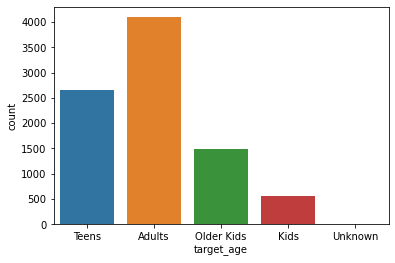

In [5]:
ratings_age = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults',
    '74 min': 'Unknown',
    '84 min': 'Unknown',
    '66 min': 'Unknown',
}
data['target_age'] = data['rating'].replace(ratings_age)

sns.countplot(x='target_age',data = data);

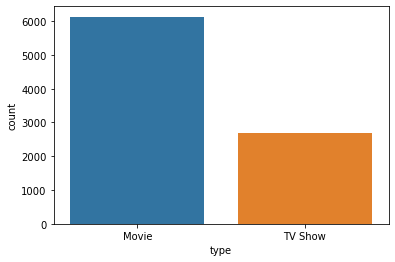

In [6]:
sns.countplot(x='type',data = data);

<AxesSubplot:xlabel='release_year', ylabel='count'>

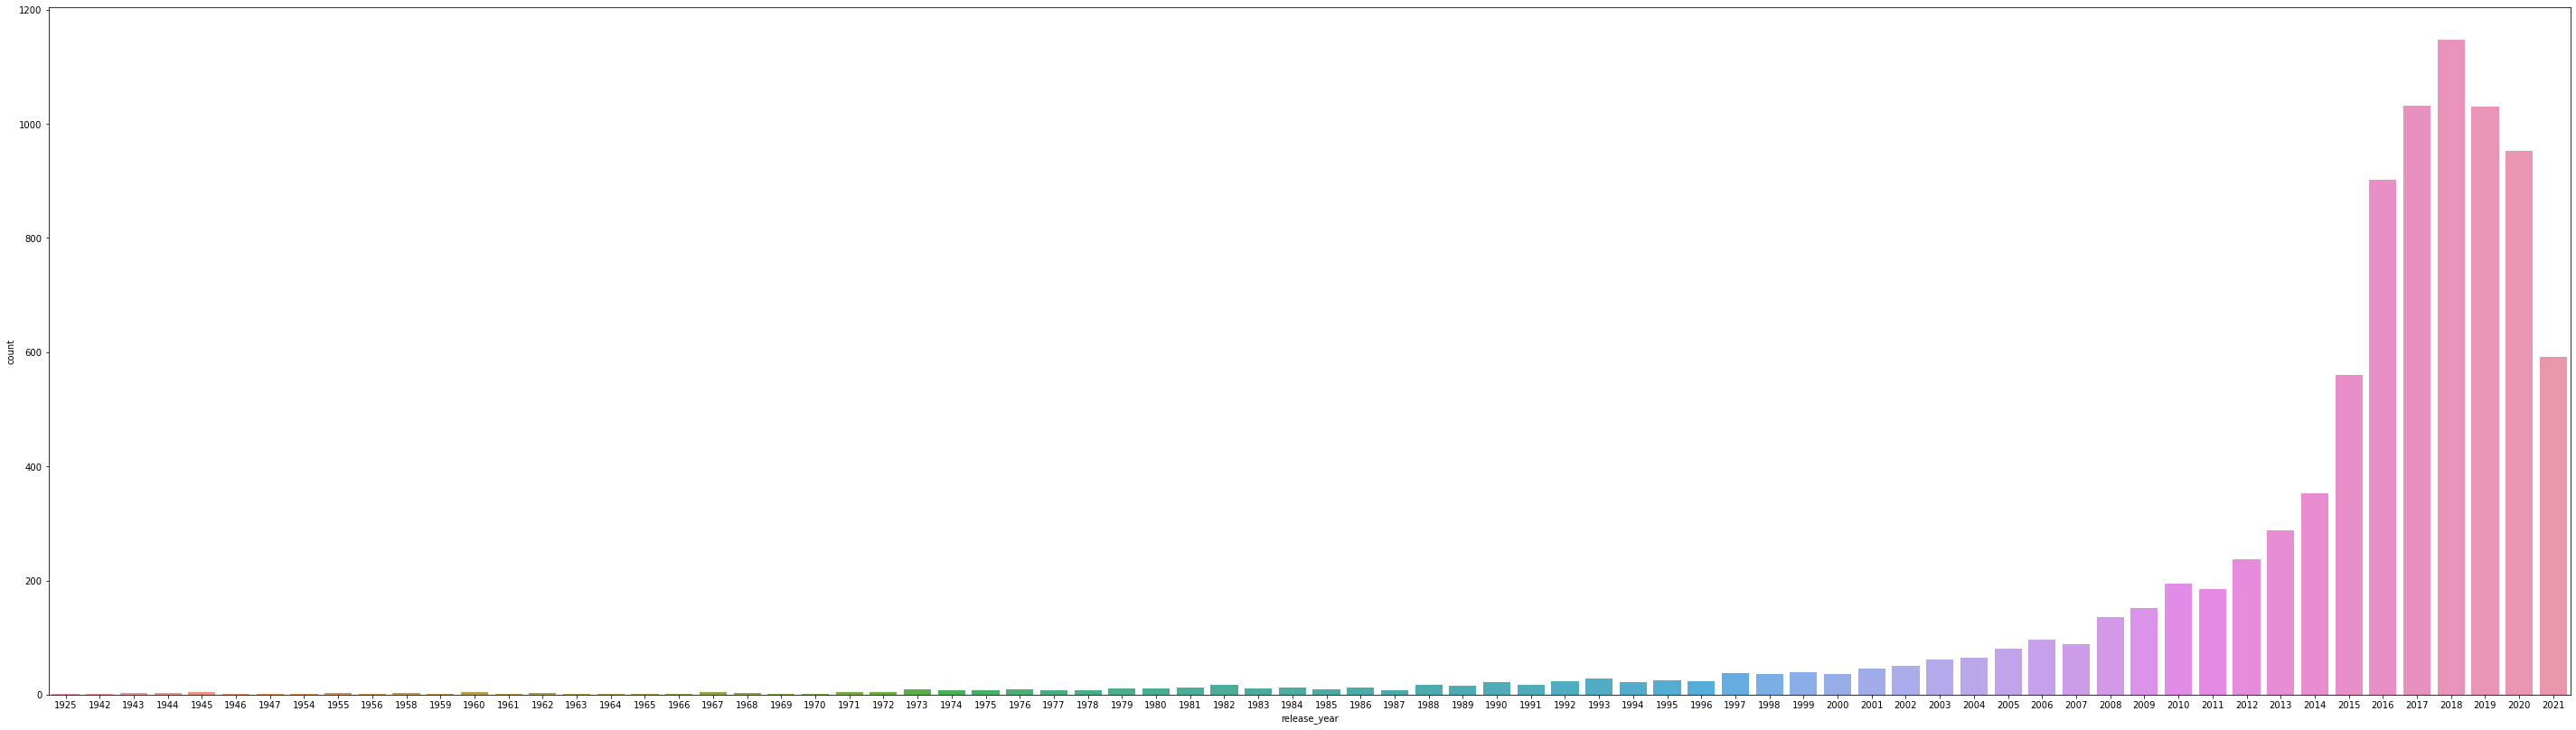

In [7]:
plt.figure(figsize = (50,14))
sns.countplot(x='release_year',data = data);

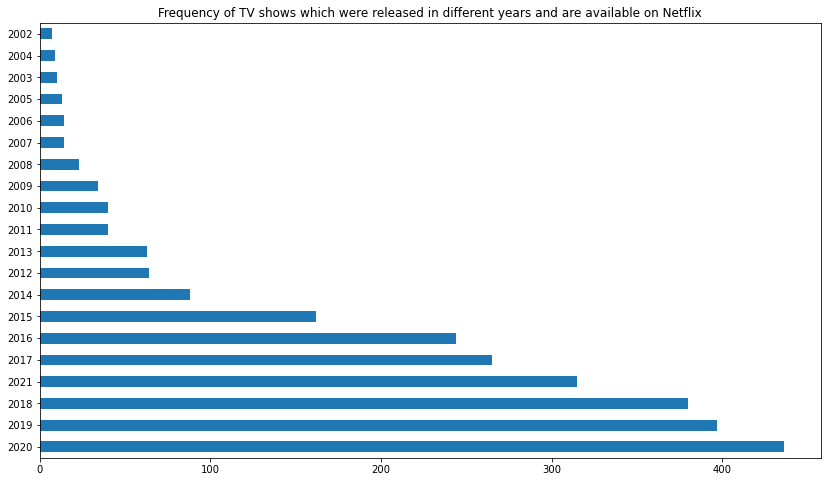

In [11]:
plt.figure(figsize=(14,8))
data[data["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="barh")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix");

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

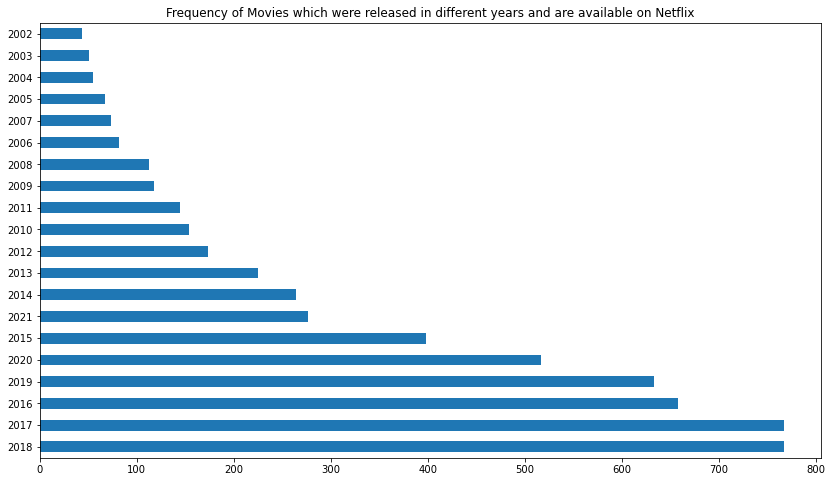

In [10]:
plt.figure(figsize=(14,8))
data[data["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="barh")
plt.title("Frequency of Movies which were released in different years and are available on Netflix");

Text(0.5, 1.0, 'Top 10 Genres of Movies')

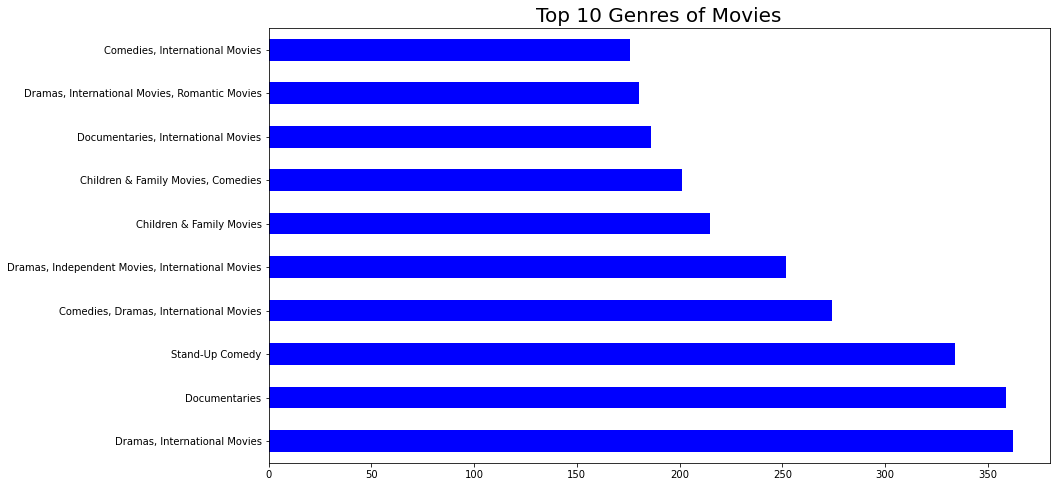

In [12]:
plt.figure(figsize=(14,8))
data[data["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="Blue")
plt.title("Top 10 Genres of Movies",size=20);

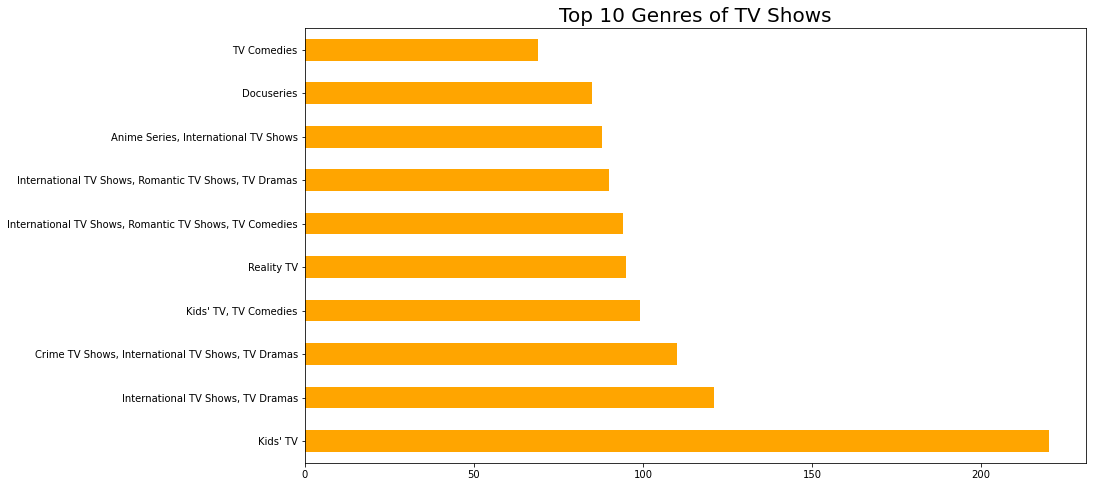

In [13]:
plt.figure(figsize=(14,8))
data[data["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="Orange")
plt.title("Top 10 Genres of TV Shows",size=20);

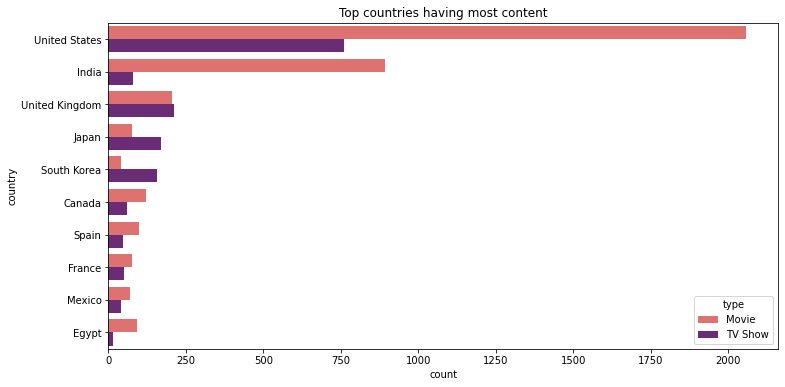

In [14]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = data,y = 'country', order = data["country"].value_counts().index[:10],hue = 'type',palette = 'magma_r')
plt.title("Top countries having most content")
plt.show();